In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, shutil
import cv2
import matplotlib.image as mpimg
from IPython.core.display import display_latex
from PIL.FontFile import WIDTH
from PIL.ImageFilter import GaussianBlur
from keras.src.backend.jax.nn import threshold
from pygments.styles.gh_dark import GRAY_3
from scipy.signal.windows import gaussian
%matplotlib inline
plt.style.use('ggplot')

ModuleNotFoundError: No module named 'cv2'

In [2]:
import os

folder = r'D:\Programming\Project\brain_tumor_dataset\yes'
count = 1

for filename in os.listdir(folder):
    source = os.path.join(folder, filename)
    # Ensure the destination filename is unique
    while True:
        destination = os.path.join(folder, f"no{count}.jpg")
        if not os.path.exists(destination):
            break
        count += 1
    os.rename(source, destination)
    print(f"Renamed: {source} -> {destination}")
    count += 1

Renamed: D:\Programming\Project\brain_tumor_dataset\yes\no10.jpg -> D:\Programming\Project\brain_tumor_dataset\yes\no1.jpg
Renamed: D:\Programming\Project\brain_tumor_dataset\yes\no100.jpg -> D:\Programming\Project\brain_tumor_dataset\yes\no2.jpg
Renamed: D:\Programming\Project\brain_tumor_dataset\yes\no1000.jpg -> D:\Programming\Project\brain_tumor_dataset\yes\no5.jpg
Renamed: D:\Programming\Project\brain_tumor_dataset\yes\no1001.jpg -> D:\Programming\Project\brain_tumor_dataset\yes\no6.jpg
Renamed: D:\Programming\Project\brain_tumor_dataset\yes\no1002.jpg -> D:\Programming\Project\brain_tumor_dataset\yes\no9.jpg
Renamed: D:\Programming\Project\brain_tumor_dataset\yes\no1003.jpg -> D:\Programming\Project\brain_tumor_dataset\yes\no10.jpg
Renamed: D:\Programming\Project\brain_tumor_dataset\yes\no1004.jpg -> D:\Programming\Project\brain_tumor_dataset\yes\no13.jpg
Renamed: D:\Programming\Project\brain_tumor_dataset\yes\no1005.jpg -> D:\Programming\Project\brain_tumor_dataset\yes\no14.jpg


In [3]:
import os

folder = r'D:\Programming\Project\brain_tumor_dataset\no'
count = 1

for filename in os.listdir(folder):
    source = os.path.join(folder, filename)
    # Ensure the destination filename is unique
    while True:
        destination = os.path.join(folder, f"no{count}.jpg")
        if not os.path.exists(destination):
            break
        count += 1
    os.rename(source, destination)
    print(f"Renamed: {source} -> {destination}")
    count += 1



Renamed: D:\Programming\Project\brain_tumor_dataset\no\no305.jpg -> D:\Programming\Project\brain_tumor_dataset\no\no1.jpg
Renamed: D:\Programming\Project\brain_tumor_dataset\no\no306.jpg -> D:\Programming\Project\brain_tumor_dataset\no\no2.jpg
Renamed: D:\Programming\Project\brain_tumor_dataset\no\no307.jpg -> D:\Programming\Project\brain_tumor_dataset\no\no3.jpg
Renamed: D:\Programming\Project\brain_tumor_dataset\no\no308.jpg -> D:\Programming\Project\brain_tumor_dataset\no\no4.jpg
Renamed: D:\Programming\Project\brain_tumor_dataset\no\no309.jpg -> D:\Programming\Project\brain_tumor_dataset\no\no5.jpg
Renamed: D:\Programming\Project\brain_tumor_dataset\no\no310.jpg -> D:\Programming\Project\brain_tumor_dataset\no\no6.jpg
Renamed: D:\Programming\Project\brain_tumor_dataset\no\no311.jpg -> D:\Programming\Project\brain_tumor_dataset\no\no7.jpg
Renamed: D:\Programming\Project\brain_tumor_dataset\no\no312.jpg -> D:\Programming\Project\brain_tumor_dataset\no\no8.jpg
Renamed: D:\Programming\

In [4]:
#EDA(Exploratory Data Analysis)

In [5]:
listyes = os.listdir(r'D:\Programming\Project\brain_tumor_dataset\yes')
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir(r'D:\Programming\Project\brain_tumor_dataset\no')
number_files_no = len(listno)
print(number_files_no)

1366
304


In [6]:
#plot

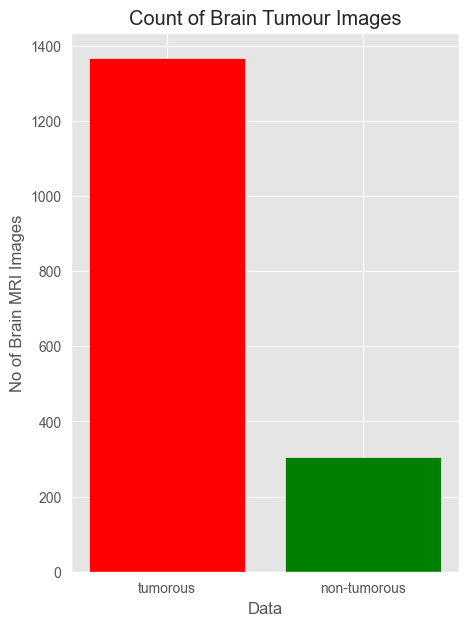

In [7]:
data = {'tumorous':number_files_yes, 'non-tumorous':number_files_no}
typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5, 7))
plt.bar(typex, values, color=['red', 'green'])
plt.xlabel('Data')
plt.ylabel('No of Brain MRI Images')
plt.title('Count of Brain Tumour Images')
plt.show()

In [8]:
#Data Argumentation
# 3650(88.16%), 490(11.83%)

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


In [10]:
#"brain_tumor_dataset\no\no736.jpg"
#N,WIDTH,HEIGHT,CHANNEL

In [11]:
def timing(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int(sec_elapsed %  (60*60) / 60)
    s = sec_elapsed % 60

    return f"{h}:{m}:{s}"

In [12]:
def augmented_data(file_dir, n_generated_samples, save_to_dir):
    data_gen = ImageDataGenerator(rotation_range=10,
                      width_shift_range=0.1,
                      height_shift_range=0.1,
                      shear_range=0.1,
                      brightness_range=(0.3, 1.0),
                      horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='nearest')
    for filename in os.listdir(file_dir):
        image = cv2.imread(file_dir + '/' + filename)
        image = image.reshape((1,) + image.shape)
        save_prefix = 'aug_' + filename[:-4]
        i=0
        for batch in data_gen.flow(x = image, batch_size = 1, save_to_dir = save_to_dir, save_prefix = save_prefix, save_format = "jpg"):
            i+=1
            if i>n_generated_samples:
                break

In [13]:
#import time
#start_time = time.time()

#yes_path = 'brain_tumor_dataset/yes'
#no_path = 'brain_tumor_dataset/no'

#augmented_data_path = 'augmented_data/'

#augmented_data(file_dir = yes_path, n_generated_samples=6, save_to_dir=augmented_data_path+'yes')
#augmented_data(file_dir = no_path, n_generated_samples=9, save_to_dir=augmented_data_path+'no')

#end_time = time.time()
#execution_time = end_time - start_time
#print(timing(execution_time))

In [14]:
def data_summary(main_path):
    yes_path = r'D:\Programming\Project\augmented_data\yes'
    no_path = r'D:\Programming\Project\augmented_data\no'

    n_pos = len(os.listdir(yes_path))
    n_neg = len(os.listdir(no_path))

    n = (n_pos + n_neg)

    pos_per = (n_pos*100)/n
    neg_per = (n_neg*100)/n

    print(f"number of sample{n}")
    print(f"{n_pos}number of positive sample in percentage: {pos_per}%")
    print(f"{n_neg}number of positive sample in percentage: {neg_per}%")

In [15]:
data_summary(augmented_data)

number of sample1712
932number of positive sample in percentage: 54.4392523364486%
780number of positive sample in percentage: 45.5607476635514%


In [16]:
listyes = os.listdir(r'D:\Programming\Project\augmented_data\yes')
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir(r'D:\Programming\Project\augmented_data\no')
number_files_no = len(listno)
print(number_files_no)

932
780


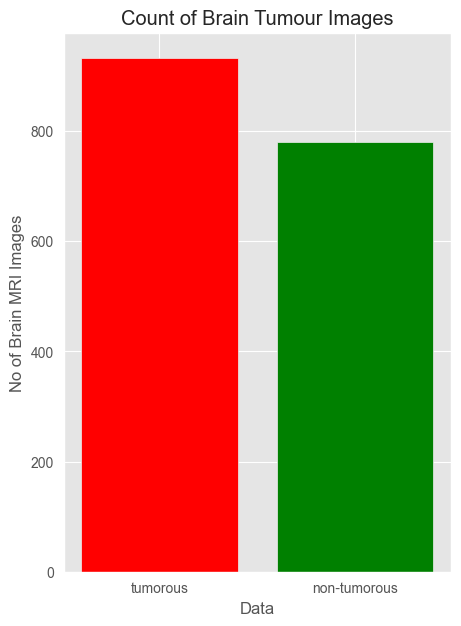

In [17]:
data = {'tumorous':number_files_yes, 'non-tumorous':number_files_no}
typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5, 7))
plt.bar(typex, values, color=['red', 'green'])
plt.xlabel('Data')
plt.ylabel('No of Brain MRI Images')
plt.title('Count of Brain Tumour Images')
plt.show()

In [18]:
#data preprocessing

In [19]:
# convert BGR to GRAY
#gaussianBlur
#threshold
#erode
#dilate
#find contours

In [20]:
import cv2
import imutils
import matplotlib.pyplot as plt

def crop_brain_tumor(image, plot=False):
    # Convert image to grayscale and apply Gaussian Blur
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Thresholding, erosion, and dilation
    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thres = cv2.erode(thres, None, iterations=2)
    thres = cv2.dilate(thres, None, iterations=2)

    # Find contours
    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    if not cnts:
        print("No contours found!")
        return None

    # Find the largest contour
    c = max(cnts, key=cv2.contourArea)

    # Get extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    # Crop the image safely
    h, w, _ = image.shape
    x_start, x_end = max(0, extLeft[0]), min(w, extRight[0])
    y_start, y_end = max(0, extTop[1]), min(h, extBot[1])
    new_image = image[y_start:y_end, x_start:x_end]

    # Plot the results if requested
    if plot:
        plt.figure(figsize=(10, 5))

        # Original Image
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title("Original Image")

        # Cropped Image
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title("Cropped Tumor")

        plt.tight_layout()
        plt.show()

    return new_image


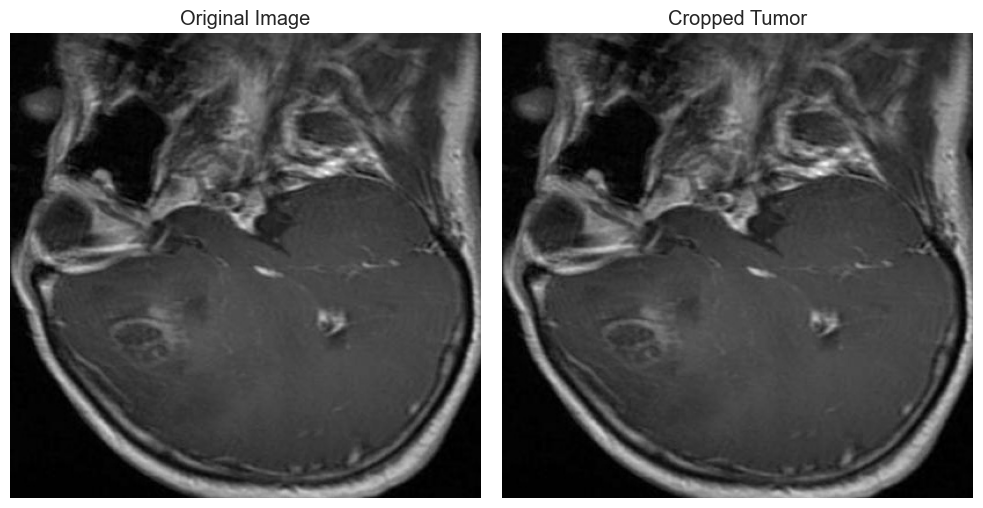

In [21]:
image = cv2.imread('augmented_data/yes/aug_no2738_0_9881.jpg')
cropped_image = crop_brain_tumor(image, plot=True)

if cropped_image is not None:
    cv2.imwrite('cropped_tumor.jpg', cropped_image)


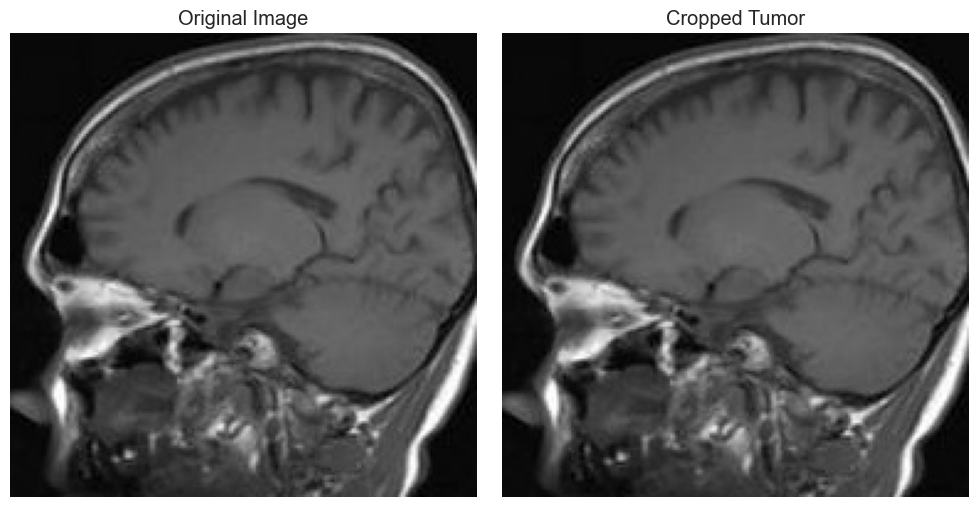

In [22]:
image = cv2.imread('augmented_data/no/aug_no15_0_8624.jpg')
cropped_image = crop_brain_tumor(image, plot=True)

if cropped_image is not None:
    cv2.imwrite('cropped_tumor.jpg', cropped_image)

In [23]:
folder1 = 'augmented_data/no/'
folder2 = 'augmented_data/yes/'

for filename in os.listdir(folder1):
    img = cv2.imread(folder1 + filename)
    img = crop_brain_tumor(img, False)
    cv2.imwrite(folder1 + filename, img)
for filename in os.listdir(folder2):
    img = cv2.imread(folder2 + filename)
    img = crop_brain_tumor(img, False)
    cv2.imwrite(folder2 + filename, img)

In [24]:
from sklearn.utils import shuffle
def load_data(dir_list, image_size):
    X=[]
    y=[]

    image_width, image_height=image_size

    for directory in dir_list:
        for filename in os.listdir(directory):
            image = cv2.imread(directory + '/' + filename)
            image = crop_brain_tumor(image, plot=False)
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation = cv2.INTER_CUBIC)
            image = image/255.00
            X.append(image)
            if directory[-3:] == "yes":
                y.append(1)
            else:
                y.append(0)
    X=np.array(X)
    y=np.array(y)

    X,y = shuffle(X,y)
    print(f"Number of example is : {len(X)}")
    print(f"X SHAPE is : {X.shape}")
    print(f"y SHAPE is : {y.shape}")
    return X,y

In [25]:
augmented_path = "augmented_data/"
augmented_yes = augmented_path + 'yes'
augmented_no = augmented_path + 'no'

IMAGE_WIDTH, IMAGE_HEIGHT = (120,120)

X,y = load_data([augmented_yes, augmented_no],(IMAGE_WIDTH, IMAGE_HEIGHT) )


Number of example is : 1712
X SHAPE is : (1712, 120, 120, 3)
y SHAPE is : (1712,)


In [26]:
def plot_sample_images(X, y, n=50):

    for label in [0,1]:
        images = X[np.argwhere(y == label)]
        n_images = images[:n]

        columns_n = 10
        rows_n = int(n/ columns_n)

        plt.figure(figsize=(20, 10))

        i = 1
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])

            plt.tick_params(axis='both', which='both',
                            top=False, bottom=False, left=False, right=False,
                            labelbottom=False, labeltop=False, labelleft=False,
                            labelright=False)

            i += 1

        label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
        plt.show()

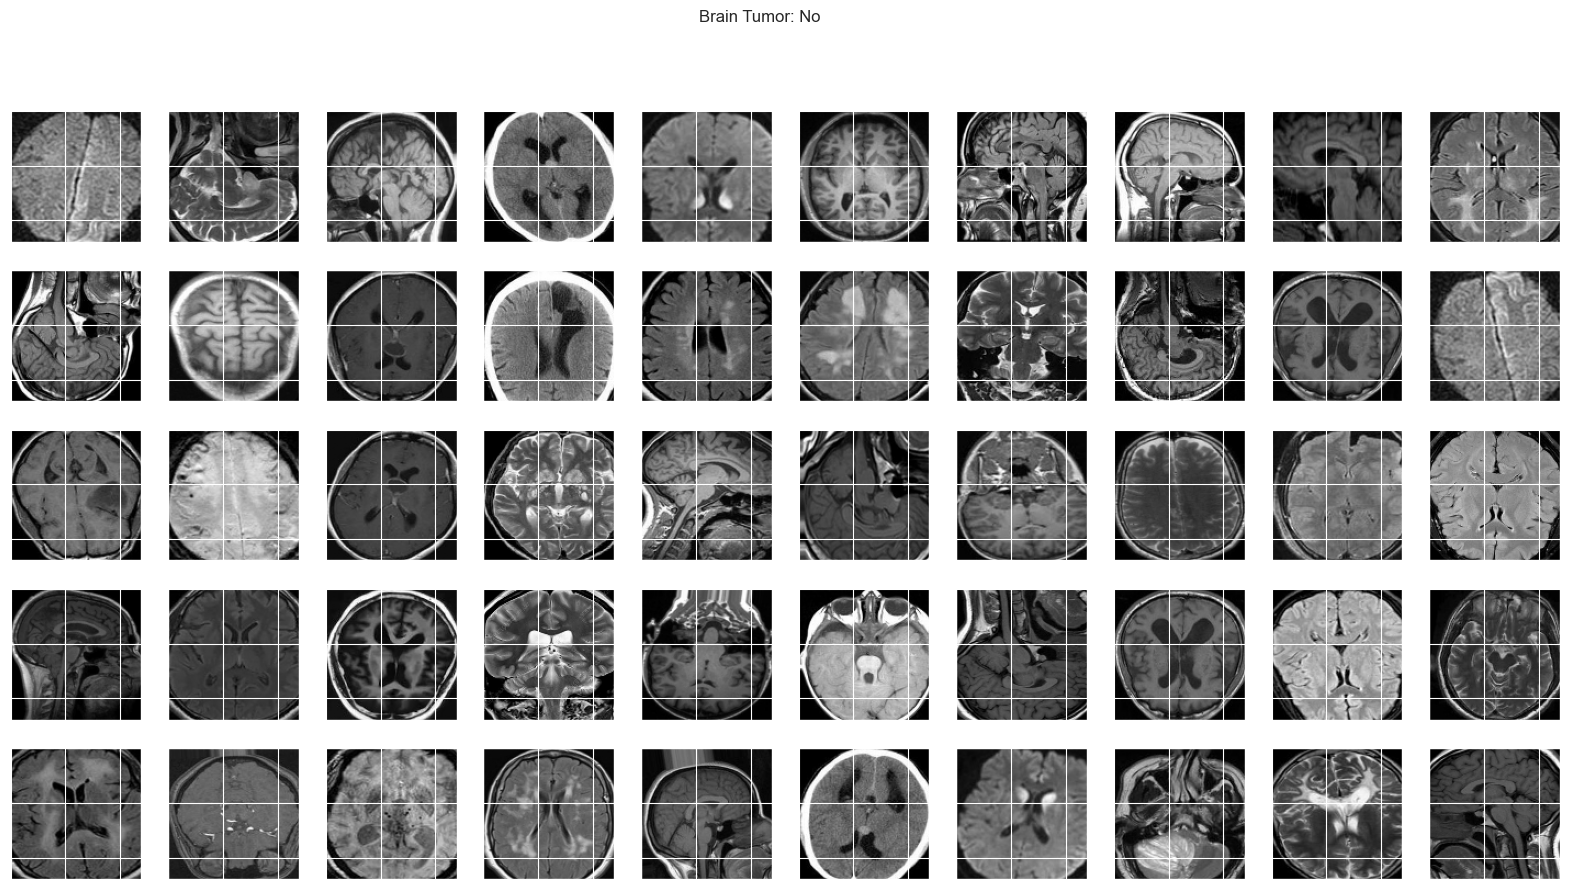

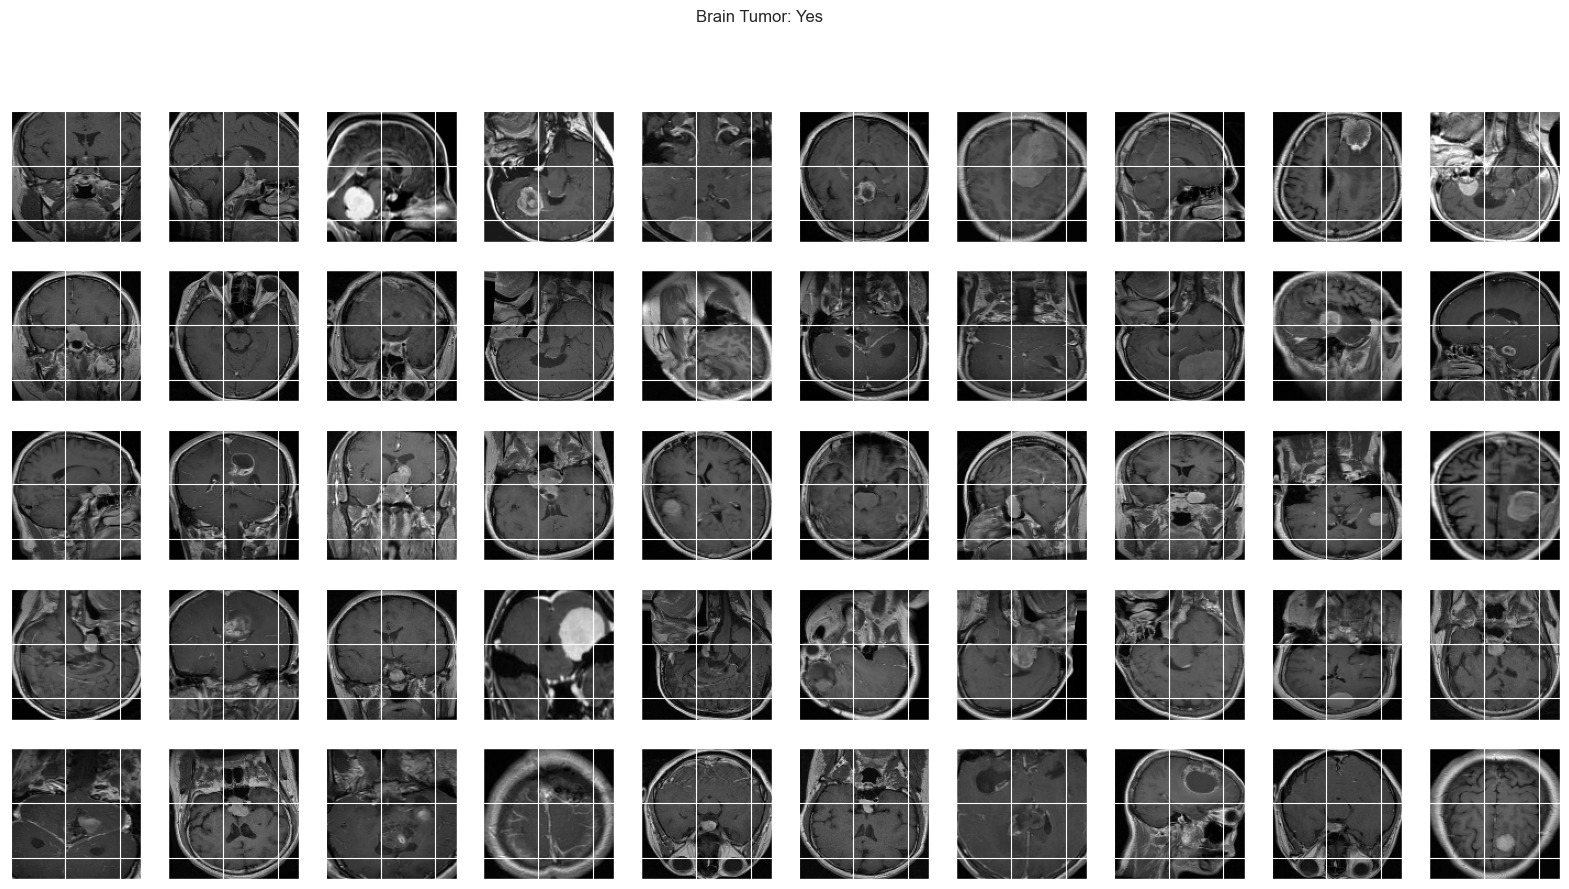

In [27]:
plot_sample_images(X,y)

In [28]:
#data splitting
#train
#test
#validation

In [29]:
import os
if not os.path.isdir('tumorous_and_nontumorous'):
    base_dir = 'tumorous_and_nontumorous'
    os.mkdir(base_dir)

In [30]:
import os
base_dir = 'tumorous_and_nontumorous'
if not os.path.isdir('tumorous_and_nontumorous/train'):
    train_dir = os.path.join(base_dir,'train')
    os.mkdir(train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test'):
    test_dir = os.path.join(base_dir, 'test')
    os.mkdir(test_dir)
if not os.path.isdir('tumorous_and_nontumorous/validation'):
    valid_dir = os.path.join(base_dir, 'valid')
    os.mkdir(valid_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'tumorous_and_nontumorous\\valid'

In [75]:
if not os.path.isdir('tumorous_and_nontumorous/train/tumorous'):
    infected_train_dir = os.path.join(train_dir ,'tumorous')
    os.mkdir(infected_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/tumorous'):
    infected_test_dir = os.path.join(test_dir , 'tumorous')
    os.mkdir(infected_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/validation/tumorous'):
    infected_valid_dir = os.path.join(valid_dir , 'tumorous')
    os.mkdir(infected_valid_dir)

In [76]:
if not os.path.isdir('tumorous_and_nontumorous/train/nontumorous'):
    healthy_train_dir = os.path.join(train_dir ,'nontumorous')
    os.mkdir(healthy_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/nontumorous'):
    healthy_test_dir = os.path.join(test_dir , 'nontumorous')
    os.mkdir(healthy_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid/nontumorous'):
    healthy_valid_dir = os.path.join(valid_dir , 'nontumorous')
    os.mkdir(healthy_valid_dir)

In [31]:
original_dataset_tumorous = os.path.join('augmented_data','yes/')
original_dataset_nontumorous = os.path.join('augmented_data','no/')

In [32]:
files = os.listdir('augmented_data/yes/')
fnames = []
for i in range(0,729):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_tumorous,fname)
    dst = os.path.join(infected_train_dir,fname)
    shutil.copy(src,dst)

NameError: name 'infected_train_dir' is not defined

In [79]:
files = os.listdir('augmented_data/yes/')
fnames = []
for i in range(729,902):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_tumorous,fname)
    dst = os.path.join( infected_test_dir,fname)
    shutil.copy(src,dst)

In [80]:
files = os.listdir('augmented_data/yes/')
fnames = []
for i in range(902,932):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_tumorous,fname)
    dst = os.path.join( infected_valid_dir,fname)
    shutil.copy(src,dst)

In [81]:
files = os.listdir('augmented_data/no/')
fnames = []
for i in range(0,624):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_nontumorous,fname)
    dst = os.path.join( healthy_train_dir,fname)
    shutil.copy(src,dst)

In [82]:
files = os.listdir('augmented_data/no/')
fnames = []
for i in range(624,702):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_nontumorous,fname)
    dst = os.path.join( healthy_test_dir,fname)
    shutil.copy(src,dst)

In [83]:
files = os.listdir('augmented_data/no/')
fnames = []
for i in range(702,780):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_nontumorous,fname)
    dst = os.path.join( healthy_valid_dir,fname)
    shutil.copy(src,dst)

In [132]:
#model building

In [33]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=0.4,
                                   vertical_flip=0.4,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   fill_mode='nearest',)
test_data_gen = ImageDataGenerator(rescale=1./255)
valid_data_gen = ImageDataGenerator(rescale=1./255)

In [34]:
train_generator = train_datagen.flow_from_directory('tumorous_and_nontumorous/train/',batch_size=32, target_size=(224,224),class_mode='categorical',shuffle=True,seed = 42, color_mode='rgb')


Found 1353 images belonging to 2 classes.


In [35]:
test_generator = test_data_gen.flow_from_directory('tumorous_and_nontumorous/test/',batch_size=32, target_size=(224,224),class_mode='categorical',shuffle=True,seed = 42, color_mode='rgb')

Found 251 images belonging to 2 classes.


In [36]:
valid_generator = valid_data_gen.flow_from_directory('tumorous_and_nontumorous/valid/',batch_size=32, target_size=(224,224),class_mode='categorical',shuffle=True,seed = 42, color_mode='rgb')

Found 108 images belonging to 2 classes.


In [37]:
class_labels = train_generator.class_indices
class_name = {value: key for (key, value) in class_labels.items()}

In [38]:
class_name

{0: 'nontumorous', 1: 'tumorous'}

In [39]:
base_model = VGG19(input_shape=(224,224,3),include_top=False,weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False

x=base_model.output
flat = Flatten()(x)
class_1 = Dense(4096,activation='relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(4096,activation='relu')(drop_out)
output = Dense(2, activation='softmax')(class_2)

model_01 = Model(base_model.input, output)
model_01.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             

 Total params: 139,578,434 (532.45 MB)

 Trainable params: 119,554,050 (456.06 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [140]:
#callback

In [40]:
filepath = 'model.h5'
es = EarlyStopping(monitor='val_loss', verbose = 1, mode='min',patience=4)
cp = ModelCheckpoint(filepath, monitor='val_loss', verbose = 1, save_best_only=True, save_weights_only=False, mode='auto',save_freq='epoch')
lrr = ReduceLROnPlateau(monitor='val_accuarcy', patience=3, verbose = 1, factor = 0.5, min_lr = 0.0001)

In [41]:
sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum = 0.9, nesterov = True)
model_01.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

C:\Users\wwwdh\AppData\Local\Programs\Python\python310\lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [42]:
history_01 = model_01.fit(train_generator, steps_per_epoch=10, epochs = 2, callbacks=[es,cp,lrr], validation_data=valid_generator)

C:\Users\wwwdh\AppData\Local\Programs\Python\python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4885 - loss: 0.7523
Epoch 1: val_loss improved from inf to 0.82908, saving model to model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - accuracy: 0.4904 - loss: 0.7503 - val_accuracy: 0.3056 - val_loss: 0.8291 - learning_rate: 1.0000e-04
Epoch 2/2


C:\Users\wwwdh\AppData\Local\Programs\Python\python310\lib\site-packages\keras\src\callbacks\callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_accuarcy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4991 - loss: 0.7462
Epoch 2: val_loss improved from 0.82908 to 0.76849, saving model to model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.4986 - loss: 0.7448 - val_accuracy: 0.3333 - val_loss: 0.7685 - learning_rate: 1.0000e-04


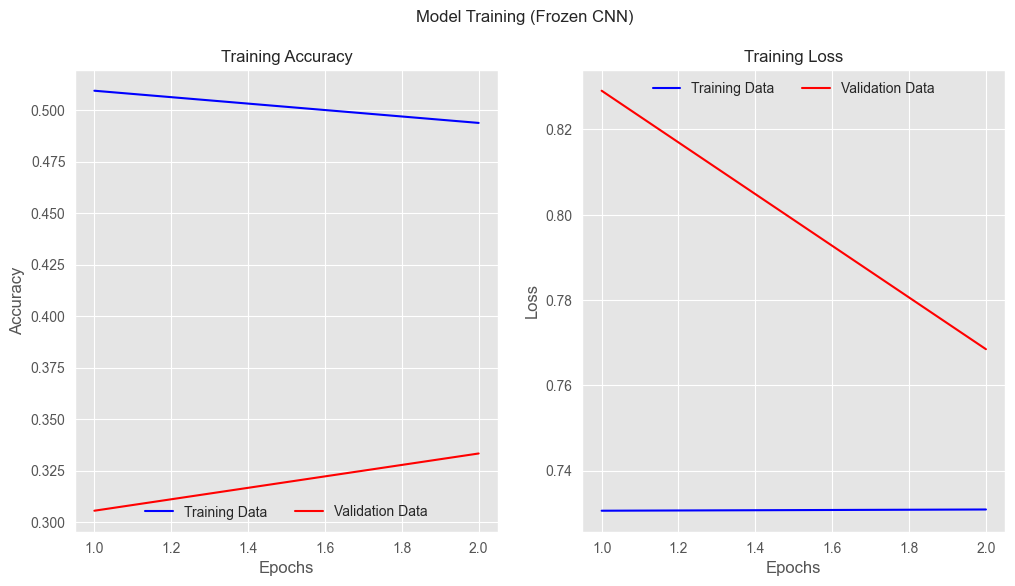

In [46]:
# Plot performance
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)
max_epoch = len(history_01.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, history_01.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_01.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, history_01.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_01.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')

In [47]:
import os

# Create the directory if it doesn't exist
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')

# Save weights with the correct filename
model_01.save_weights(filepath="model_weights/weights.weights.h5", overwrite=True)

print("Weights saved successfully.")


Weights saved successfully.


In [48]:
model_01.load_weights("model_weights/weights.weights.h5")
vgg_val_eval_01 = model_01.evaluate(valid_generator)
vgg_test_eval_01 = model_01.evaluate(test_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.3427 - loss: 0.7640


C:\Users\wwwdh\AppData\Local\Programs\Python\python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.6896 - loss: 0.6008


In [49]:
print(f'Validation Loss: {vgg_val_eval_01[0]}')
print(f'Validation Acc: {vgg_val_eval_01[1]}')
print(f'Testing Loss: {vgg_test_eval_01[0]}')
print(f'Testing Acc: {vgg_test_eval_01[1]}')

Validation Loss: 0.7684904932975769
Validation Acc: 0.3333333432674408
Testing Loss: 0.5898999571800232
Testing Acc: 0.7091633677482605


In [50]:
# Total number of samples in the test generator
nb_sample = len(test_generator.filenames)

# Number of batches required to process all test samples
steps = int(np.ceil(nb_sample / test_generator.batch_size))

# Perform prediction
vgg_prediction_01 = model_01.predict(test_generator, steps=steps, verbose=1)

# Get predicted class indices
y_pred = np.argmax(vgg_prediction_01, axis=1)


8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step


In [ ]:
# Increamental unfreezing and fine tuning

In [51]:
base_model = VGG19(include_top=False, input_shape=(240,240,3))
base_model_layer_names = [layer.name for layer in base_model.layers]
base_model_layer_names


['input_layer_1',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_conv4',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_conv4',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_conv4',
 'block5_pool']

In [62]:
import os
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Step 1: Define the base model
base_model = VGG19(include_top=False, input_shape=(224, 224, 3))

# Step 2: Extract output of the base model
x = base_model.output
flat = Flatten()(x)

# Step 3: Add layers matching the saved model architecture
class_1 = Dense(4096, activation='relu')(flat)  # Match number of nodes to saved model
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation='relu')(drop_out)  # Confirm shape matches the saved model
output = Dense(2, activation='softmax')(class_2)

# Step 4: Create the full model
model_02 = Model(inputs=base_model.inputs, outputs=output)

# Step 5: Load weights
weights_path = r"D:\Programming\Project\model_weights/weights.weights.h5"
if os.path.exists(weights_path):
    try:
        model_02.load_weights(weights_path)
        print("Weights loaded successfully.")
    except Exception as e:
        print(f"Error loading weights: {e}")
else:
    print(f"Weight file not found at {weights_path}.")

# Step 6: Set layers to non-trainable or trainable based on your requirements
set_trainable = False
for layer in base_model.layers:
    if layer.name in ['block5_conv3', 'block5_conv4']:
        set_trainable = True
    layer.trainable = set_trainable

# Step 7: Display model summary
print(model_02.summary())

# Optional: Save the updated model weights to ensure compatibility
updated_weights_path = r"D:\Programming\Project\model_weights/updated_weights.weights.h5"
if not os.path.exists("D:/Programming/Project/model_weights/"):
    os.mkdir("D:/Programming/Project/model_weights/")
model_02.save_weights(updated_weights_path, overwrite=True)
print(f"Updated weights saved at {updated_weights_path}.")

Error loading weights: A total of 2 objects could not be loaded. Example error message for object <Dense name=dense_16, built=True>:

The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(4096, 1152), Received: value.shape=(4096, 4096). Target variable: <Variable path=dense_16/kernel, shape=(4096, 1152), dtype=float32, value=[[-0.00732618  0.02368591  0.01640304 ...  0.02174347  0.02710605
   0.01023427]
 [ 0.03266671 -0.02041562  0.02727616 ... -0.00264863  0.01266265
  -0.01689986]
 [-0.01518033 -0.0213309  -0.0247009  ... -0.01366581  0.02628327
   0.00226888]
 ...
 [ 0.02542841  0.02221034  0.01723982 ...  0.01099217 -0.02871777
   0.01584801]
 [-0.00881751 -0.03065507 -0.00951001 ... -0.00388252  0.0262497
   0.02909092]
 [ 0.0236444  -0.01954556 -0.0137847  ...  0.03059969 -0.00381804
  -0.02416321]]>

List of objects that could not be loaded:
[<Dense name=dense_16, built=True>, <Dense name=dense_17, built=True>

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4096)           │             

 Total params: 127,510,978 (486.42 MB)

 Trainable params: 112,206,210 (428.03 MB)

 Non-trainable params: 15,304,768 (58.38 MB)

None
Updated weights saved at D:\Programming\Project\model_weights/updated_weights.weights.h5.


In [63]:

# Step 1: Define the base model
base_model = VGG19(include_top=False, input_shape=(224, 224, 3))

# Step 2: Get layer names for reference
base_model_layer_names = [layer.name for layer in base_model.layers]
print("Base model layer names:", base_model_layer_names)

# Step 3: Extract output of the base model
x = base_model.output
flat = Flatten()(x)

# Step 4: Add custom layers
class_1 = Dense(4608, activation='relu')(flat)  # Ensure this matches the saved model
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation='relu')(drop_out)  # Ensure this matches the saved model
output = Dense(2, activation='softmax')(class_2)

# Step 5: Create the full model
model_02 = Model(inputs=base_model.inputs, outputs=output)

# Step 6: Load weights
weights_path = r"D:\Programming\Project\model_weights/updated_weights.weights.h5"
if os.path.exists(weights_path):
    try:
        model_02.load_weights(weights_path)
        print("Weights loaded successfully.")
    except Exception as e:
        print(f"Error loading weights: {e}")
else:
    print(f"Weight file not found at {weights_path}.")

# Step 7: Set layers to non-trainable or trainable based on your requirements
set_trainable = False
for layer in base_model.layers:
    if layer.name in [' block5_conv4', 'block5_conv3']:
        set_trainable = True
    layer.trainable = set_trainable  # Set trainable status based on the condition

# Step 8: Display model summary
print(model_02.summary())

Base model layer names: ['input_layer_7', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_conv4', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_conv4', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_conv4', 'block5_pool']
Error loading weights: A total of 2 objects could not be loaded. Example error message for object <Dense name=dense_18, built=True>:

The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(25088, 4608), Received: value.shape=(25088, 4096). Target variable: <Variable path=dense_18/kernel, shape=(25088, 4608), dtype=float32, value=[[ 0.01053724 -0.00678949 -0.00072957 ...  0.00851052  0.00667914
   0.00195304]
 [ 0.01240831  0.00638966  0.00731177 ...  0.00128614  0.0040923
   0.01041518]
 [-0.008913   -0.00333431 -0.01272807 ...  0.01304651 -0.00293992
 

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4608)           │   115,610,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4608)           │             

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 125,641,602 (479.28 MB)

 Non-trainable params: 15,304,768 (58.38 MB)

None


In [64]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler

# Step 1: Define the SGD optimizer without the decay parameter
sgd = SGD(learning_rate=0.0001, momentum=0.9, nesterov=True)

# Step 2: Compile the model
model_02.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Optional: Define a learning rate schedule
def scheduler(epoch, lr):
    if epoch > 10:  # After 10 epochs, reduce the learning rate
        return lr * 0.1
    return lr

# Step 3: Create a LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(scheduler)

# Step 4: Fit the model with the learning rate scheduler
# Assuming you have your training data in `train_data` and `train_labels`
# model_02.fit(train_data, train_labels, epochs=50, callbacks=[lr_scheduler])

In [65]:
history_02 = model_02.fit(train_generator, steps_per_epoch=10, epochs = 2, callbacks=[es,cp,lrr], validation_data=valid_generator)

Epoch 1/2


C:\Users\wwwdh\AppData\Local\Programs\Python\python310\lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_184']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5110 - loss: 0.7372
Epoch 1: val_loss improved from 0.76849 to 0.73218, saving model to model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 0.5109 - loss: 0.7380 - val_accuracy: 0.4259 - val_loss: 0.7322 - learning_rate: 1.0000e-04
Epoch 2/2


C:\Users\wwwdh\AppData\Local\Programs\Python\python310\lib\site-packages\keras\src\callbacks\callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_accuarcy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5501 - loss: 0.6896
Epoch 2: val_loss improved from 0.73218 to 0.66666, saving model to model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.5487 - loss: 0.6905 - val_accuracy: 0.6481 - val_loss: 0.6667 - learning_rate: 1.0000e-04


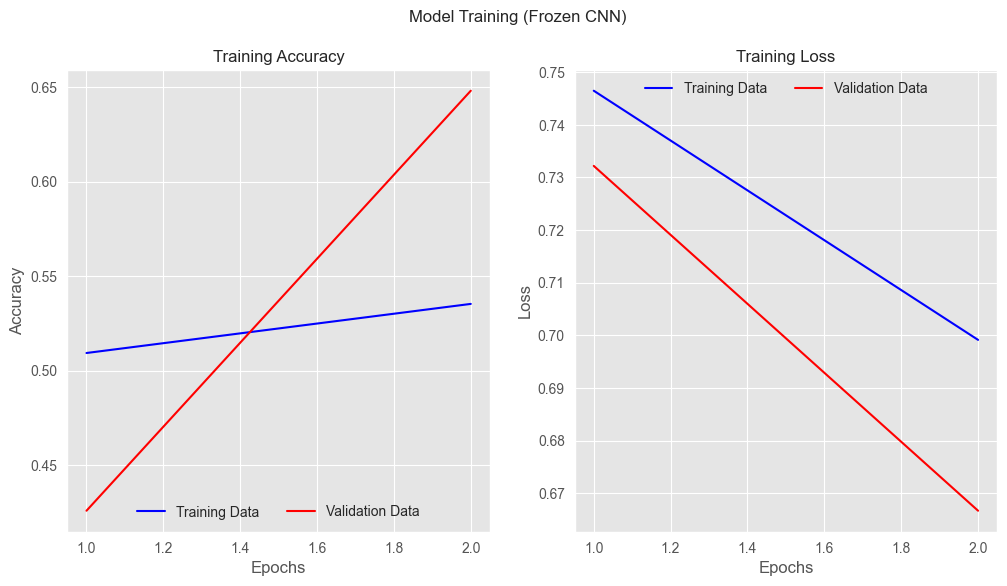

In [66]:
# Plot performance
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)
max_epoch = len(history_01.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, history_02.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_02.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, history_02.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_02.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')

In [78]:
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')
model_02.save_weights(filepath="model_weights/updated_2_weights.weights.h5", overwrite=True)

In [80]:
model_02.load_weights("model_weights/updated_2_weights.weights.h5")
vgg_val_eval_02 = model_02.evaluate(valid_generator)
vgg_test_eval_02 = model_02.evaluate(test_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.6363 - loss: 0.6684
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.5690 - loss: 0.6760


In [ ]:
# Unfreezing the entire network

In [84]:
base_model = VGG19(include_top=False, input_shape=(224,224,3))
base_model_layer_names = [layer.name for layer in base_model.layers]
base_model_layer_names

x=base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation = 'relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(drop_out)
output = Dense(2, activation = 'softmax')(class_2)

model_03 = Model(base_model.inputs, output)
model_03.load_weights('model_weights/updated_2_weights.weights.h5')

sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum = 0.9, nesterov = True)
model_03.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

In [85]:
model_03.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 4608)           │   115,610,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4608)           │             

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 140,946,370 (537.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# history_03 = model_03.fit(train_generator, steps_per_epoch=10, epochs = 2, callbacks=[es,cp,lrr], validation_data=valid_generator)

In [86]:
model_03.load_weights("model_weights/updated_2_weights.weights.h5")
vgg_val_eval_03 = model_03.evaluate(valid_generator)
vgg_test_eval_03 = model_03.evaluate(test_generator)

C:\Users\wwwdh\AppData\Local\Programs\Python\python310\lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_292']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6103 - loss: 0.6748
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.6312 - loss: 0.6641
